# Data Analysis

## Import, config and load

In [1]:
from Levenshtein import distance as edit_distance
from Snomed import Snomed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
INPUT_FILE = './data/chv.csv'
SNOMED_PATH = './data/snomed/'
FIGSIZE = (12,6)
TITLE_ARGS = {'fontsize': 20, 'y': 1.02}
sns.set(style="whitegrid")

In [3]:
snomed_taxonomy = Snomed(SNOMED_PATH, taxonomy=True)
snomed_taxonomy.load_snomed()

snomed_all = Snomed(SNOMED_PATH, taxonomy=False)
snomed_all.load_snomed()

terms = pd.read_csv(INPUT_FILE, sep='\t', encoding='utf8')

In [4]:
terms['Term_Lower'] = terms.Term.str.lower()

In [5]:
terms

,ID,Term,General SNOMED Label,General SNOMED ID,Specific SNOMED Label,Specific SNOMED ID,Example,Example Link,Origin_Sheet,Term_Lower
0,0,5FU,Fluorouracil,387172005,Fluorouracil,387172005,I can ' t do 5FU because it causes cardiotoxic...,https://www.reddit.com/4gs56p,./stage_1/Batch 7-Ready.xlsx,5fu
1,1,5FU,Fluorouracil,387172005,Fluorouracil,387172005,He is starting 5FU and Leucovorin and Hercepti...,https://www.reddit.com/9tekw3,./stage_1/Batch 7-Ready.xlsx,5fu
2,2,5FU,Fluorouracil,387172005,Fluorouracil,387172005,Around treatment 9 they realized that I was al...,https://www.reddit.com/916p80,./stage_1/Batch 7-Ready.xlsx,5fu
3,3,5HTP,Oxitriptan,73916008,Oxitriptan,73916008,"Aside from edibles I take Gaba , Taurine , sub...",https://www.reddit.com/8b7cb4,./stage_1/Batch8-Ready.xlsx,5htp
4,4,5HTP,Oxitriptan,73916008,Oxitriptan,73916008,I was recomended the 5HTP and as I said it ini...,https://www.reddit.com/771elt,./stage_1/Batch8-Ready.xlsx,5htp
...,...,...,...,...,...,...,...,...,...,...
20010,20010,zopiclone,Zopiclone,395929002,Zopiclone,395929002,"Feel free to use the zopiclone , but try and w...",https://www.reddit.com/5nmwof,./stage_1/batch 4-Ready.xlsx,zopiclone
20011,20011,zopiclone,Zopiclone,395929002,Zopiclone,395929002,I have had zopiclone in my medicine cabinet fo...,https://www.reddit.com/3t2izz,./stage_1/batch 4-Ready.xlsx,zopiclone
20012,20012,zzzquil,Diphenhydramine,372682005,Diphenhydramine,372682005,With that in mind we took along caffeine pills...,https://www.reddit.com/2wq5xe,./stage_1/Batch 5-Ready.xlsx,zzzquil
20013,20013,zzzquil,Diphenhydramine,372682005,Diphenhydramine,372682005,Zzzquil and exercise are the only things I rec...,https://www.reddit.com/5jj84h,./stage_1/Batch 5-Ready.xlsx,zzzquil


### Other visualisations

In [6]:
concept_pairs = terms.groupby(['General SNOMED ID', 'Specific SNOMED ID']).nunique()[[
    'ID', 'Term', 'General SNOMED ID', 'Specific SNOMED ID', 'Example', 'Term_Lower']]
concept_pairs

,,ID,Term,General SNOMED ID,Specific SNOMED ID,Example,Term_Lower
General SNOMED ID,Specific SNOMED ID,,,,,,
111002,111002,3,1,1,1,3,1
200001,200001,6,2,1,1,6,1
308006,308006,3,1,1,1,3,1
313005,313005,3,1,1,1,3,1
317006,317006,3,1,1,1,3,1
...,...,...,...,...,...,...,...
1082661000119103,1082661000119103,3,1,1,1,3,1
15639721000119105,15639721000119105,3,1,1,1,3,1
15639921000119107,15639921000119107,3,1,1,1,3,1


In [7]:
general_ids = terms.groupby(['General SNOMED ID']).nunique().sort_values('ID', ascending=False)[
    ['ID','Example', 'Term', 'Term_Lower', 'Specific SNOMED ID']
].reset_index()
general_ids

,General SNOMED ID,ID,Example,Term,Term_Lower,Specific SNOMED ID
0,5935008,70,70,23,22,2
1,225013001,57,57,19,19,1
2,34000006,53,53,17,16,3
3,373265006,50,50,16,16,3
4,85828009,46,46,15,15,2
...,...,...,...,...,...,...
3640,385532007,1,1,1,1,1
3641,285651005,1,1,1,1,1
3642,373188003,1,1,1,1,1
3643,274152003,1,1,1,1,1


In [8]:
specific_ids = terms.groupby(['Specific SNOMED ID']).nunique().sort_values('Example', ascending=False)[
    ['ID', 'Example', 'Term', 'Term_Lower', 'General SNOMED ID']
].reset_index()
specific_ids

,Specific SNOMED ID,ID,Example,Term,Term_Lower,General SNOMED ID
0,5935008,72,72,24,23,2
1,225013001,57,57,19,19,1
2,34000006,51,51,17,16,1
3,69805005,51,51,17,16,2
4,44054006,49,49,17,17,3
...,...,...,...,...,...,...
3998,309464009,1,1,1,1,1
3999,721033002,1,1,1,1,1
4000,17986004,1,1,1,1,1
4001,126633007,1,1,1,1,1


## General stats

In [9]:
unique_terms = len(terms.Term.unique())
unique_g_labels = len(terms['General SNOMED ID'].unique())
unique_s_labels = len(terms['Specific SNOMED ID'].unique())
unique_examples = len(terms['Example'].unique())

print(f"""
There are 
- {len(terms)} terms,
- {unique_terms} unique terms, 
- {len(concept_pairs)} concept pairs,
- {unique_g_labels} unique generic SNOMED IDs, 
- {unique_s_labels} unique specific SNOMED IDs,
- {unique_examples} unique examples
""")


There are 
- 20015 terms,
- 6404 unique terms, 
- 4208 concept pairs,
- 3645 unique generic SNOMED IDs, 
- 4003 unique specific SNOMED IDs,
- 19911 unique examples



In [10]:
print(f"""
There are 
- {len(general_ids.loc[general_ids.ID > 2])} general IDs with more than 2 samples, 
- {len(general_ids.loc[general_ids.ID == 2])} general IDs with with 2 samples, 
- {len(general_ids.loc[general_ids.ID == 1])} general IDs with just 1 sample, 
- {len(specific_ids.loc[specific_ids.ID > 2])} specific IDs with more than 2 samples, 
- {len(specific_ids.loc[specific_ids.ID == 2])} specific IDs with 2 samples, 
- {len(specific_ids.loc[specific_ids.ID == 1])} specific IDs with just 1 sample
""")


There are 
- 3607 general IDs with more than 2 samples, 
- 28 general IDs with with 2 samples, 
- 10 general IDs with just 1 sample, 
- 3631 specific IDs with more than 2 samples, 
- 106 specific IDs with 2 samples, 
- 266 specific IDs with just 1 sample



In [11]:
print(f"""
There are 
- {len(general_ids.loc[general_ids.Term > 2])} general IDs with more than 2 terms, 
- {len(general_ids.loc[general_ids.Term == 2])} general IDs with with 2 terms, 
- {len(general_ids.loc[general_ids.Term == 1])} general IDs with just 1 terms, 
- {len(specific_ids.loc[specific_ids.Term > 2])} specific IDs with more than 2 terms, 
- {len(specific_ids.loc[specific_ids.Term == 2])} specific IDs with 2 terms, 
- {len(specific_ids.loc[specific_ids.Term == 1])} specific IDs with just 1 terms, 
""")


There are 
- 565 general IDs with more than 2 terms, 
- 769 general IDs with with 2 terms, 
- 2311 general IDs with just 1 terms, 
- 609 specific IDs with more than 2 terms, 
- 820 specific IDs with 2 terms, 
- 2574 specific IDs with just 1 terms, 



In [12]:
print(f"""
Each General ID has
- {general_ids.Term.mean():2.2f} different surface terms on average \
(std {general_ids.Term.std():2.2f},\
 min {general_ids.Term.min():2.2f},\
 max {general_ids.Term.max():2.2f})
- {general_ids.Term_Lower.mean():2.2f} different surface terms on average \
(std {general_ids.Term_Lower.std():2.2f},\
 min {general_ids.Term_Lower.min():2.2f},\
 max {general_ids.Term_Lower.max():2.2f})
- {general_ids.ID.mean():2.2f} different samples on average \
(std {general_ids.ID.std():2.2f},\
 min {general_ids.ID.min():2.2f},\
 max {general_ids.ID.max():2.2f})
- {general_ids['Specific SNOMED ID'].mean():2.2f} different Specific SNOMED IDs on average \
(std {general_ids['Specific SNOMED ID'].std():2.2f},\
 min {general_ids['Specific SNOMED ID'].min():2.2f},\
 max {general_ids['Specific SNOMED ID'].max():2.2f})
""")


Each General ID has
- 1.76 different surface terms on average (std 1.60, min 1.00, max 23.00)
- 1.70 different surface terms on average (std 1.54, min 1.00, max 22.00)
- 5.49 different samples on average (std 5.02, min 1.00, max 70.00)
- 1.15 different Specific SNOMED IDs on average (std 0.52, min 1.00, max 9.00)



In [13]:
print(f"""
Each Specific ID has
- {specific_ids.Term.mean():2.2f} different surface terms on average \
(std {specific_ids.Term.std():2.2f},\
 min {specific_ids.Term.min():2.2f},\
 max {specific_ids.Term.max():2.2f})
- {specific_ids.Term_Lower.mean():2.2f} different surface terms on average \
(std {specific_ids.Term_Lower.std():2.2f},\
 min {specific_ids.Term_Lower.min():2.2f},\
 max {specific_ids.Term_Lower.max():2.2f})
- {specific_ids.ID.mean():2.2f} different samples on average \
(std {specific_ids.ID.std():2.2f},\
 min {specific_ids.ID.min():2.2f},\
 max {specific_ids.ID.max():2.2f})
- {specific_ids['General SNOMED ID'].mean():2.2f} different General SNOMED IDs on average \
(std {specific_ids['General SNOMED ID'].std():2.2f},\
 min {specific_ids['General SNOMED ID'].min():2.2f},\
 max {specific_ids['General SNOMED ID'].max():2.2f})
""")


Each Specific ID has
- 1.74 different surface terms on average (std 1.61, min 1.00, max 24.00)
- 1.69 different surface terms on average (std 1.54, min 1.00, max 23.00)
- 5.00 different samples on average (std 4.83, min 1.00, max 72.00)
- 1.05 different General SNOMED IDs on average (std 0.23, min 1.00, max 3.00)



## Term distribution

### #of samples by unique General/Snomed ID

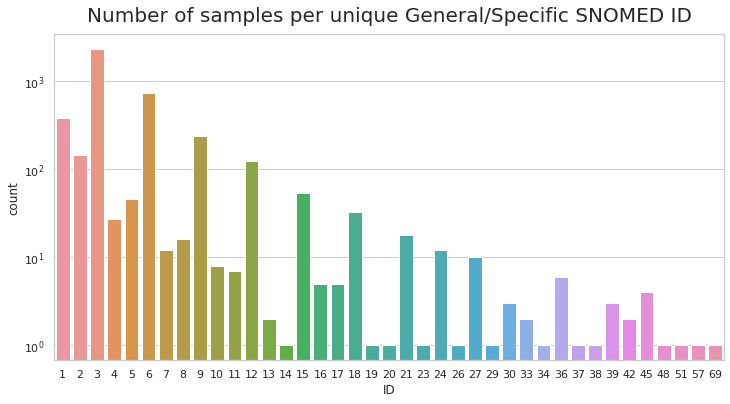

In [14]:
concept_pairs.sort_values('ID', ascending=False, inplace=True)

plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = concept_pairs.ID)
ax.set_title('Number of samples per unique General/Specific SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

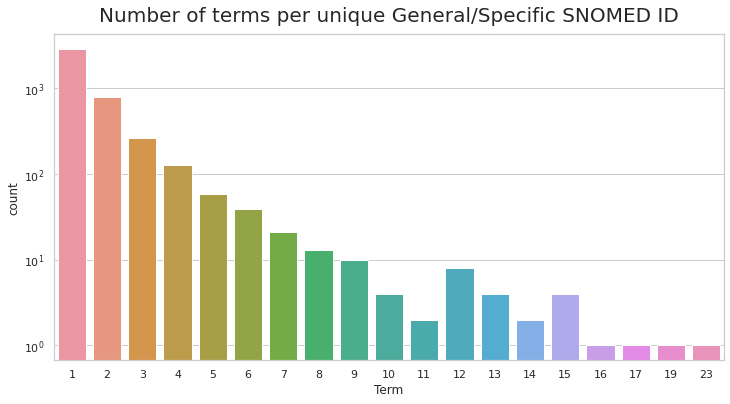

In [15]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = concept_pairs.Term)
ax.set_title('Number of terms per unique General/Specific SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

In [16]:
frequent_concepts = concept_pairs.loc[concept_pairs.Term >= 15].Term.reset_index(
)
frequent_concepts['Label'] = frequent_concepts.apply(
    lambda x: snomed_taxonomy[x['General SNOMED ID']]['desc'], axis=1)
frequent_concepts

,General SNOMED ID,Specific SNOMED ID,Term,Label
0,5935008,5935008,23,Oral contraception
1,225013001,225013001,19,Feeling bad
2,34000006,34000006,17,Crohn's disease
3,373265006,373265006,16,Analgesic (substance)
4,69805005,69805005,15,Insulin pump
5,706130009,706130009,15,Glucose monitoring system
6,85828009,85828009,15,Autoimmune disease
7,46635009,46635009,15,Diabetes mellitus type I


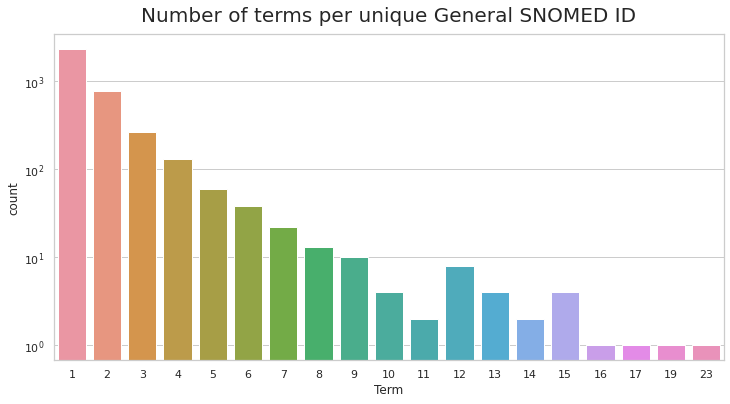

In [17]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = general_ids.Term)
ax.set_title('Number of terms per unique General SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

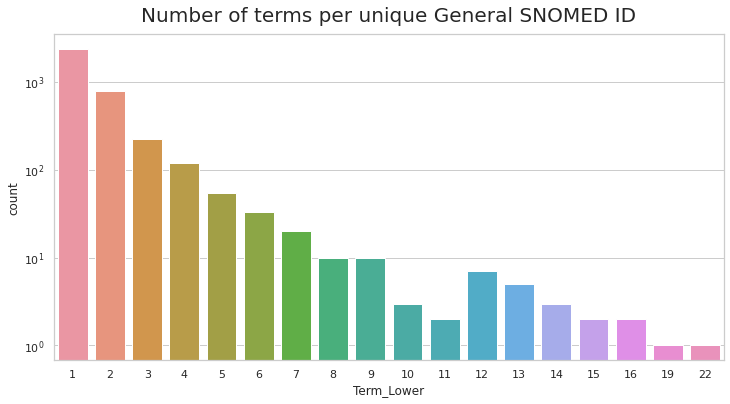

In [18]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = general_ids.Term_Lower)
ax.set_title('Number of terms per unique General SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

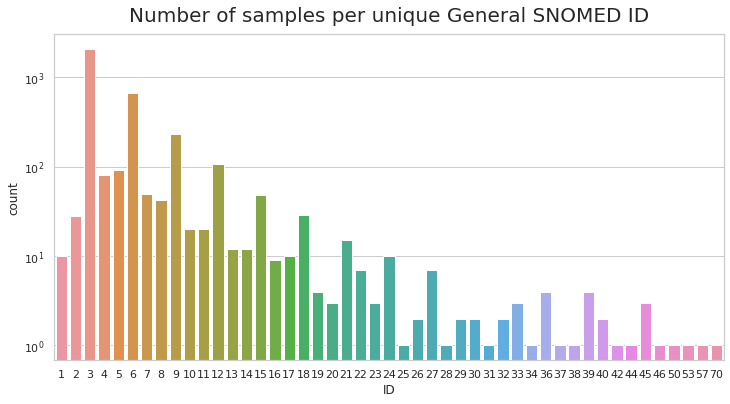

In [19]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = general_ids.ID)
ax.set_title('Number of samples per unique General SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

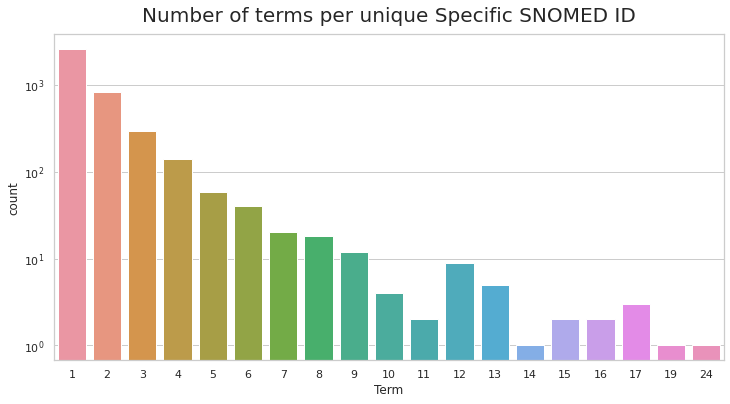

In [20]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = specific_ids.Term)
ax.set_title('Number of terms per unique Specific SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

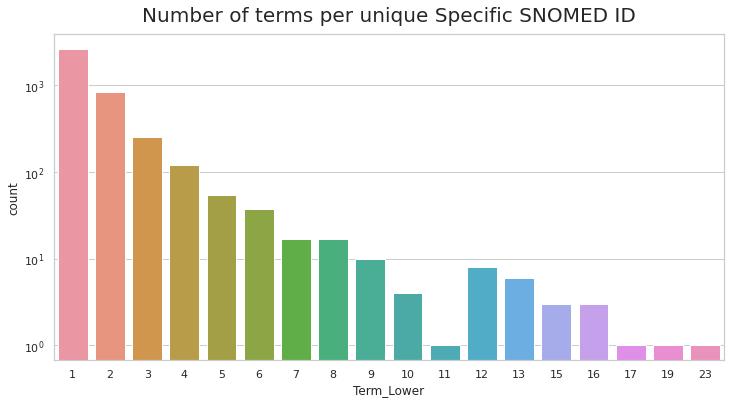

In [21]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = specific_ids.Term_Lower)
ax.set_title('Number of terms per unique Specific SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

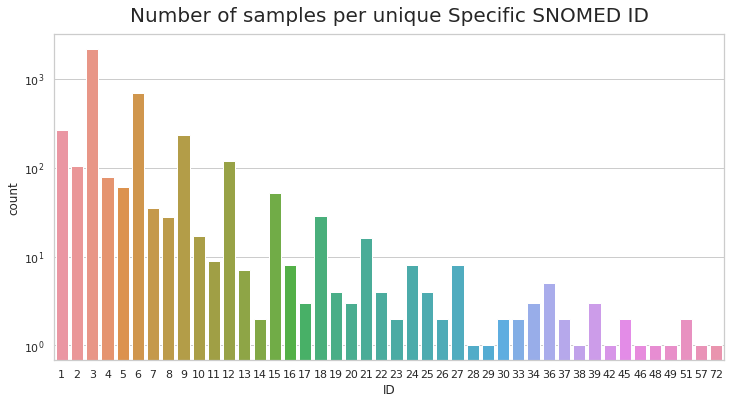

In [22]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = specific_ids.ID)
ax.set_title('Number of samples per unique Specific SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

## Term distance

In [23]:
def get_minimum_distance(snomed, sid, term):
    term = term.strip().lower()
    labels = set([x.split('(')[0].strip().lower() for x in snomed_taxonomy.index_definition[str(sid)]])
    distances = [edit_distance(term, label) for label in labels]
    return min(distances)

### General

In [24]:
term_gsid_pairs = terms[['Term', 'General SNOMED ID']].drop_duplicates().reset_index(drop=True)
term_gsid_pairs.head()

,Term,General SNOMED ID
0,5FU,387172005
1,5HTP,73916008
2,6MP,386835005
3,A1C,443911005
4,A1C tests,43396009


In [25]:
term_gsid_pairs['Edit Distance'] = term_gsid_pairs.apply(
    lambda x: get_minimum_distance(snomed_taxonomy, x['General SNOMED ID'], x.Term),
    axis=1)
term_gsid_pairs.head()

,Term,General SNOMED ID,Edit Distance
0,5FU,387172005,1
1,5HTP,73916008,8
2,6MP,386835005,1
3,A1C,443911005,2
4,A1C tests,43396009,20


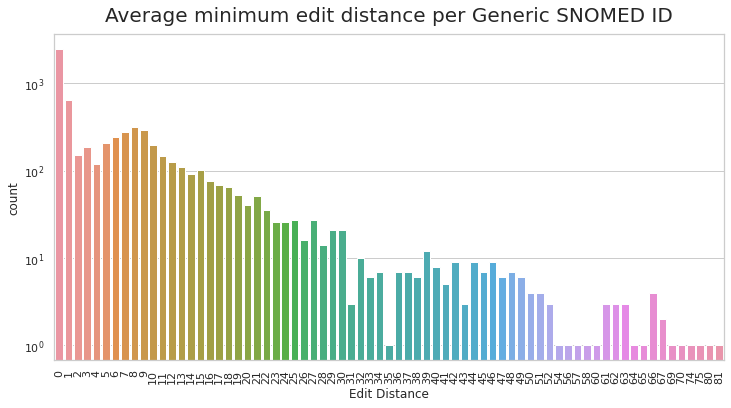

In [26]:
plt.figure(figsize=FIGSIZE)
plt.xticks(rotation=90)
ax = sns.countplot(x = term_gsid_pairs['Edit Distance'])
ax.set_title('Average minimum edit distance per Generic SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

In [27]:
print(f'Mean minimum generic term distance: {term_gsid_pairs["Edit Distance"].mean():.2f}')
print(f'STD  minimum generic term distance: {term_gsid_pairs["Edit Distance"].std():.2f}')

Mean minimum generic term distance: 6.29
STD  minimum generic term distance: 9.31


### Specific

In [28]:
term_ssid_pairs = terms[['Term', 'Specific SNOMED ID']].drop_duplicates().reset_index(drop=True)
term_ssid_pairs.head()

,Term,Specific SNOMED ID
0,5FU,387172005
1,5HTP,73916008
2,6MP,386835005
3,A1C,443911005
4,A1C tests,43396009


In [29]:
term_ssid_pairs['Edit Distance'] = term_ssid_pairs.apply(
    lambda x: get_minimum_distance(snomed_taxonomy, x['Specific SNOMED ID'], x.Term),
    axis=1)
term_ssid_pairs.head()

,Term,Specific SNOMED ID,Edit Distance
0,5FU,387172005,1
1,5HTP,73916008,8
2,6MP,386835005,1
3,A1C,443911005,2
4,A1C tests,43396009,20


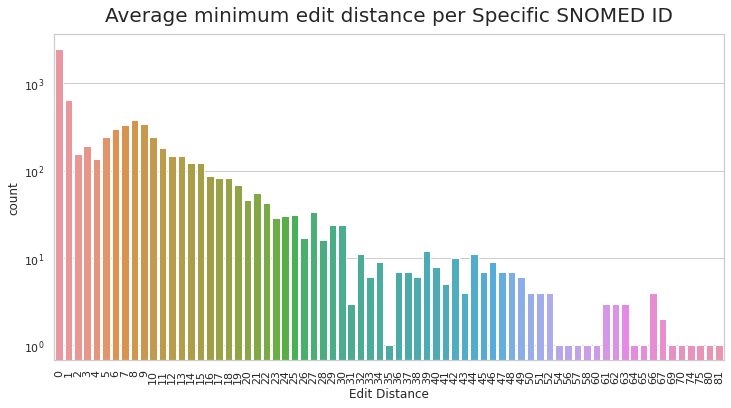

In [30]:
plt.figure(figsize=FIGSIZE)
plt.xticks(rotation=90)
ax = sns.countplot(x = term_ssid_pairs['Edit Distance'])
ax.set_title('Average minimum edit distance per Specific SNOMED ID',
             **TITLE_ARGS)
ax.set_yscale("log")
plt.show()

In [31]:
print(f'Mean minimum specific term distance: {term_ssid_pairs["Edit Distance"].mean():.2f}')
print(f'STD  minimum specific term distance: {term_ssid_pairs["Edit Distance"].std():.2f}')

Mean minimum specific term distance: 6.73
STD  minimum specific term distance: 9.24


## Calculate Ancestry

In [32]:
terms['Distance_Taxonomic'] = terms.apply(lambda x: snomed_taxonomy.safe_distance(
    x['General SNOMED ID'], x['Specific SNOMED ID']),
                                axis=1)
terms['Distance_Full'] = terms.apply(lambda x: snomed_all.safe_distance(
    x['General SNOMED ID'], x['Specific SNOMED ID']),
                                axis=1)
terms['Ancestry_Taxonomic'] = terms.apply(lambda x: snomed_taxonomy.is_ancestor(
    x['General SNOMED ID'], x['Specific SNOMED ID']),
                                axis=1)
terms['Ancestry_Full'] = terms.apply(lambda x: snomed_all.is_ancestor(
    x['General SNOMED ID'], x['Specific SNOMED ID']),
                                axis=1)
terms.head()

,ID,Term,General SNOMED Label,General SNOMED ID,Specific SNOMED Label,Specific SNOMED ID,Example,Example Link,Origin_Sheet,Term_Lower,Distance_Taxonomic,Distance_Full,Ancestry_Taxonomic,Ancestry_Full
0,0,5FU,Fluorouracil,387172005,Fluorouracil,387172005,I can ' t do 5FU because it causes cardiotoxic...,https://www.reddit.com/4gs56p,./stage_1/Batch 7-Ready.xlsx,5fu,0,0,True,True
1,1,5FU,Fluorouracil,387172005,Fluorouracil,387172005,He is starting 5FU and Leucovorin and Hercepti...,https://www.reddit.com/9tekw3,./stage_1/Batch 7-Ready.xlsx,5fu,0,0,True,True
2,2,5FU,Fluorouracil,387172005,Fluorouracil,387172005,Around treatment 9 they realized that I was al...,https://www.reddit.com/916p80,./stage_1/Batch 7-Ready.xlsx,5fu,0,0,True,True
3,3,5HTP,Oxitriptan,73916008,Oxitriptan,73916008,"Aside from edibles I take Gaba , Taurine , sub...",https://www.reddit.com/8b7cb4,./stage_1/Batch8-Ready.xlsx,5htp,0,0,True,True
4,4,5HTP,Oxitriptan,73916008,Oxitriptan,73916008,I was recomended the 5HTP and as I said it ini...,https://www.reddit.com/771elt,./stage_1/Batch8-Ready.xlsx,5htp,0,0,True,True


In [33]:
concept_pairs = pd.DataFrame(
    [[x, y] for (x, y) in
    concept_pairs.index.values], columns=['General SNOMED ID', 'Specific SNOMED ID'])

concept_pairs['Distance_Taxonomic'] = concept_pairs.apply(
    lambda x: snomed_taxonomy.safe_distance(x['General SNOMED ID'], x[
        'Specific SNOMED ID']),
    axis=1)
concept_pairs['Distance_Full'] = concept_pairs.apply(
    lambda x: snomed_all.safe_distance(x['General SNOMED ID'], x[
        'Specific SNOMED ID']),
    axis=1)
concept_pairs['Ancestry_Taxonomic'] = concept_pairs.apply(
    lambda x: snomed_taxonomy.is_ancestor(x['General SNOMED ID'], x[
        'Specific SNOMED ID']),
    axis=1)
concept_pairs['Ancestry_Full'] = concept_pairs.apply(
    lambda x: snomed_all.is_ancestor(x['General SNOMED ID'], x[
        'Specific SNOMED ID']),
    axis=1)
concept_pairs.head()

,General SNOMED ID,Specific SNOMED ID,Distance_Taxonomic,Distance_Full,Ancestry_Taxonomic,Ancestry_Full
0,5935008,5935008,0,0,True,True
1,225013001,225013001,0,0,True,True
2,34000006,34000006,0,0,True,True
3,373265006,373265006,0,0,True,True
4,69805005,69805005,0,0,True,True


In [34]:
has_specific = len(
    terms.loc[terms['General SNOMED ID'] != terms['Specific SNOMED ID']])

specific_is_descendant = len(terms.loc[terms.Distance_Taxonomic > 0])
specific_is_not_descendant = len(terms.loc[~terms.Ancestry_Taxonomic])
specific_has_path = len(terms.loc[terms.Distance_Full > 0])
specific_has_not_path = len(terms.loc[~terms.Ancestry_Full])

print(
    f'Of        {len(terms):5.0f} examples,\n'
    f'There are {has_specific:5.0f} examples a with a different Specific SNOMED ID '
    f'({100*has_specific/len(terms):0.2f}%)\n'
    f'Of these, {specific_is_descendant:5.0f} are descendant of the General ID in the taxonomy'
    f'({100*specific_is_descendant/has_specific:0.2f}%)\n'
    f'      and {specific_is_not_descendant:5.0f} aren\'t '
    f'({100*specific_is_not_descendant/has_specific:0.2f}%);\n'
    f'          {specific_has_path:5.0f} have a path to the General ID in the full graph'
    f'({100*specific_has_path/has_specific:0.2f}%)\n'
    f'      and {specific_has_not_path:5.0f} haven\'t '
    f'({100*specific_has_not_path/has_specific:0.2f}%)\n')

Of        20015 examples,
There are   930 examples a with a different Specific SNOMED ID (4.65%)
Of these,   411 are descendant of the General ID in the taxonomy(44.19%)
      and   520 aren't (55.91%);
            579 have a path to the General ID in the full graph(62.26%)
      and   358 haven't (38.49%)



In [35]:
has_specific = len(concept_pairs.loc[concept_pairs['General SNOMED ID'] != concept_pairs['Specific SNOMED ID']])

specific_is_descendant = len(concept_pairs.loc[concept_pairs.Distance_Taxonomic > 0])
specific_is_not_descendant = len(concept_pairs.loc[~concept_pairs.Ancestry_Taxonomic])
specific_has_path = len(concept_pairs.loc[concept_pairs.Distance_Full > 0])
specific_has_not_path = len(concept_pairs.loc[~concept_pairs.Ancestry_Full])

print(
    f'Of        {len(concept_pairs):5.0f} concepts,\n'
    f'There are {has_specific:5.0f} concepts with a different Specific SNOMED ID '
    f'({100*has_specific/len(concept_pairs):0.2f}%)\n'
    f'Of these, {specific_is_descendant:5.0f} have a path to the General ID in the taxonomy'
    f'({100*specific_is_descendant/has_specific:0.2f}%)\n'
    f'      and {specific_is_not_descendant:5.0f} aren\'t '
    f'({100*specific_is_not_descendant/has_specific:0.2f}%);\n'
    f'          {specific_has_path:5.0f} have a path to the General ID in the full graph'
    f'({100*specific_has_path/has_specific:0.2f}%)\n'
    f'      and {specific_has_not_path:5.0f} haven\'t '
    f'({100*specific_has_not_path/has_specific:0.2f}%)\n')


Of         4208 concepts,
There are   574 concepts with a different Specific SNOMED ID (13.64%)
Of these,   261 have a path to the General ID in the taxonomy(45.47%)
      and   314 aren't (54.70%);
            362 have a path to the General ID in the full graph(63.07%)
      and   217 haven't (37.80%)



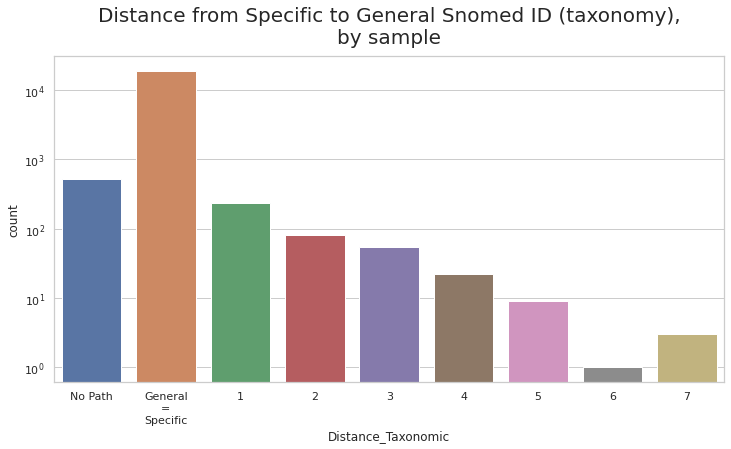

In [36]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = terms.Distance_Taxonomic)
ax.set_title('Distance from Specific to General Snomed ID (taxonomy),\nby sample',
             **TITLE_ARGS)
ax.set_xticklabels(['No Path', 'General\n=\nSpecific'] + list(range(1,8)))
ax.set_yscale("log")
plt.show()

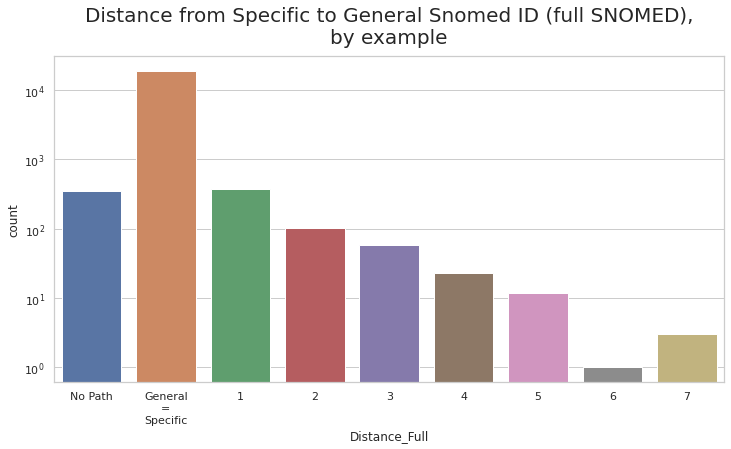

In [37]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = terms.Distance_Full)
ax.set_title('Distance from Specific to General Snomed ID (full SNOMED),\nby example',
             **TITLE_ARGS)
ax.set_xticklabels(['No Path', 'General\n=\nSpecific'] + list(range(1,8)))
ax.set_yscale("log")
plt.show()

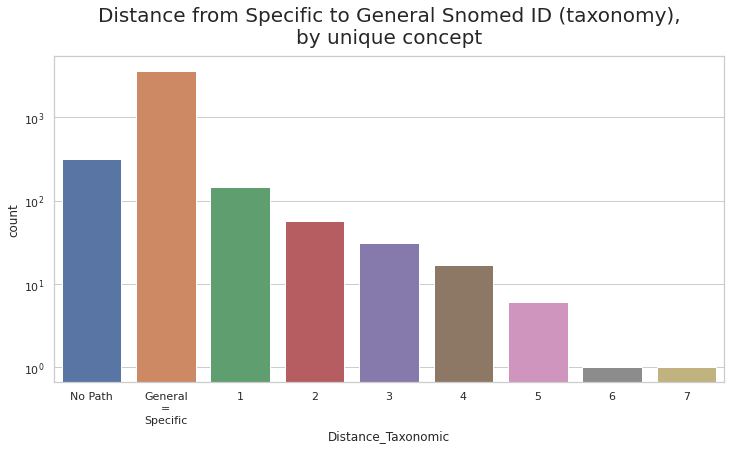

In [38]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = concept_pairs.Distance_Taxonomic)
ax.set_title('Distance from Specific to General Snomed ID (taxonomy),\nby unique concept',
             **TITLE_ARGS)
ax.set_xticklabels(['No Path', 'General\n=\nSpecific'] + list(range(1,8)))
ax.set_yscale("log")
plt.show()

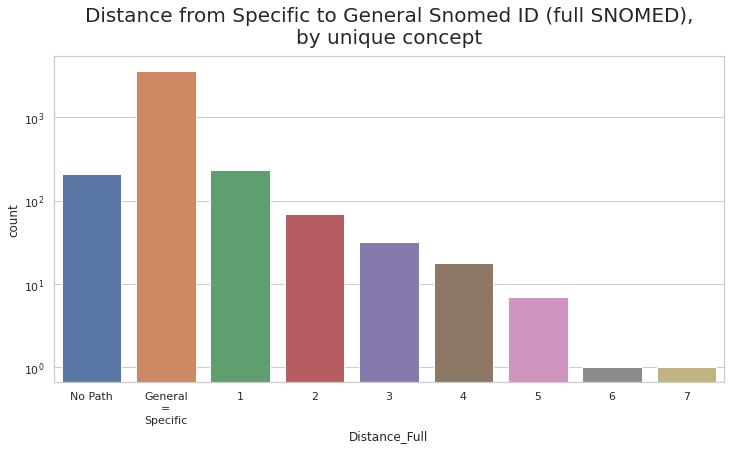

In [39]:
plt.figure(figsize=FIGSIZE)
ax = sns.countplot(x = concept_pairs.Distance_Full)
ax.set_title('Distance from Specific to General Snomed ID (full SNOMED),\nby unique concept',
             **TITLE_ARGS)
ax.set_xticklabels(['No Path', 'General\n=\nSpecific'] + list(range(1,8)))
ax.set_yscale("log")
plt.show()